In [ ]:
!pip install bert-score==0.3.13

In [163]:
!pip show pandas

Name: pandas
Version: 1.4.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.8/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: bert-score


In [3]:
import numpy as np
import pandas as pd
import pickle
import tqdm
from bert_score import BERTScorer

In [4]:
with open('./newsela_silver.pickle', 'rb') as f:
    newsela_silver = pickle.load(f)
with open('./newsela_gold.pickle', 'rb') as f:
    newsela_gold = pickle.load(f)

In [5]:
golds_list = []
simples = []
originals = []
golds_group_ids = []
for i in tqdm.tqdm(range(len(newsela_gold))):
    gold = newsela_gold.iloc[i]['inter']
    group_id = newsela_gold.iloc[i]['group_id']
    simple = newsela_gold.iloc[i]['simple']
    original = newsela_gold.iloc[i]['original']
    for j in range(len(gold)):
        golds_list.append(gold[j][0])
        simples.append(simple)
        originals.append(original)
        golds_group_ids.append(group_id)
golds_df = pd.DataFrame({'gold':golds_list, 'group_id':golds_group_ids, 'simple':simples, 'original':originals})

100%|██████████| 16084/16084 [00:06<00:00, 2371.65it/s]


In [82]:
golds_df

,gold,group_id,simple,original
0,American women will soon be free to fight on t...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
1,American women will soon be able to fight on t...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
2,American women will soon be able to go to war ...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
3,And they will go with the public 's support .,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
4,The Defense Department announced it was ending...,1,A new poll shows most Americans support the ch...,Most Americans favor the Defense Department 's...
...,...,...,...,...
44604,It is expected to harvest somewhere between 1 ...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...
44605,It is expected to harvest about 66 million pou...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...
44606,"Unlike California and Colombia , however , Flo...",16083,Florida specializes in green avocados .,"Florida specializes in "" green skins "" that ar..."
44607,"Unlike California and Colombia , however , Flo...",16083,Florida specializes in green avocados .,"Florida specializes in "" green skins "" that ar..."


In [12]:
golds_df_gr = golds_df.groupby('group_id')

In [13]:
golds_df_gr.apply(lambda x: x.sample(n=max(1, round(len(x)/2)), random_state=0)).reset_index(level='group_id', drop=True)

,gold,group_id,simple,original
2,American women will soon be able to go to war ...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
3,And they will go with the public 's support .,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
6,Most Americans support the decision and do not...,1,A new poll shows most Americans support the ch...,Most Americans favor the Defense Department 's...
7,A new poll shows most Americans support the de...,1,A new poll shows most Americans support the ch...,Most Americans favor the Defense Department 's...
10,The military said many of the banned jobs will...,2,Many of the banned jobs will open up to women ...,The Pentagon said it expects to open up many j...
...,...,...,...,...
44596,Florida is the second-largest avocado-producin...,16081,Florida is the second-largest avocado state in...,The state is the second-largest producer behin...
44603,Florida is the second-largest avocado state in...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...
44601,Florida is the second-largest avocado-producin...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...
44608,"Unlike California and Colombia , however , Flo...",16083,Florida specializes in green avocados .,"Florida specializes in "" green skins "" that ar..."


In [14]:
silvers_list = []
simples = []
originals = []
silvers_group_ids = []
for i in tqdm.tqdm(range(len(newsela_silver))):
    silver = newsela_silver.iloc[i]['inter']
    group_id = newsela_silver.iloc[i]['group_id']
    simple = newsela_silver.iloc[i]['simple']
    original = newsela_silver.iloc[i]['original']
    for j in range(len(silver)):
        silvers_list.append(silver[j])
        simples.append(simple)
        originals.append(original)
        silvers_group_ids.append(group_id)
silvers_df = pd.DataFrame({'silver':silvers_list, 'group_id':silvers_group_ids, 'simple':simples, 'original':originals})

100%|██████████| 16084/16084 [00:06<00:00, 2338.38it/s]


In [84]:
silvers_df

,silver,group_id,simple,original
0,American women will be fought with American wo...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
1,American women will be able to fight in wars .,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
2,Wars of the future will soon be able to fight ...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
3,Wars of the future will soon be fought with Am...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
4,American women will soon be fought with Americ...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...
...,...,...,...,...
174215,It California and is expected to harvest somew...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...
174216,The state is the second - largest producer beh...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...
174217,The state is the second - largest producer beh...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...
174218,It California and is grow year or about 66 mil...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...


In [15]:
lowercase = False
tokenizer = "moses"
bertscore_rescale = BERTScorer(batch_size=128, nthreads=8, lang="en", rescale_with_baseline=True)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a

In [27]:
%%timeit
scores_silver_simple = bertscore_rescale.score(silvers_df['silver'].tolist(), silvers_df['simple'].tolist())

5min 40s ± 312 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
scores_silver_simple = bertscore_rescale.score(silvers_df['silver'].tolist(), silvers_df['simple'].tolist())
scores_silver_original = bertscore_rescale.score(silvers_df['silver'].tolist(), silvers_df['original'].tolist())
scores_gold_simple = bertscore_rescale.score(golds_df['gold'].tolist(), golds_df['simple'].tolist())
scores_gold_original = bertscore_rescale.score(golds_df['gold'].tolist(), golds_df['original'].tolist())

In [17]:
silvers_df['BS_f1_silver_simple'] = scores_silver_simple[2]
silvers_df['BS_f1_silver_original'] = scores_silver_original[2]
silvers_df['BS_f1_mean'] = (scores_silver_simple[2] + scores_silver_original[2]) / 2

In [18]:
golds_df['BS_f1_gold_simple'] = scores_gold_simple[2]
golds_df['BS_f1_gold_original'] = scores_gold_original[2]
golds_df['BS_f1_mean'] = (scores_gold_simple[2] + scores_gold_original[2]) / 2

In [19]:
import matplotlib.pyplot as plt

In [88]:
silvers_df['BS_f1_mean'].mean()

0.5535176

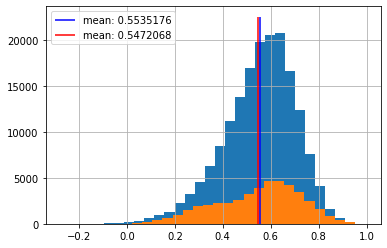

In [20]:
silvers_df['BS_f1_mean'].hist(bins=30)
plt.vlines(silvers_df['BS_f1_mean'].mean(), ymin=0, ymax=22500, colors='blue', label='mean: '+str(silvers_df['BS_f1_mean'].mean()))
#plt.vlines(silvers_df['BS_f1_mean'].median(), ymin=0, ymax=22500, colors='lightblue', label='median: '+str(silvers_df['BS_f1_mean'].median()))
golds_df['BS_f1_mean'].hist(bins=30)
plt.vlines(golds_df['BS_f1_mean'].mean(), ymin=0, ymax=22500, colors='red', label='mean: ' + str(golds_df['BS_f1_mean'].mean()))
#plt.vlines(golds_df['BS_f1_mean'].median(), ymin=0, ymax=22500, colors='orange', label='median: '+str(golds_df['BS_f1_mean'].median()))
plt.legend()
plt.show()

In [151]:
len(silvers_df[silvers_df['BS_f1_mean'] > silvers_df['BS_f1_mean'].mean()]) / len(silvers_df['BS_f1_mean'])

0.5452359086212835

In [152]:
len(golds_df[golds_df['BS_f1_mean'] > golds_df['BS_f1_mean'].mean()]) / len(golds_df['BS_f1_mean'])

0.557757403214598

In [144]:
silvers_df[silvers_df['BS_f1_mean'] > silvers_df['BS_f1_mean'].mean()]

,silver,group_id,simple,original,BS_f1_silver_simple,BS_f1_silver_original,BS_f1_mean
1,American women will be able to fight in wars .,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...,0.921524,0.335906,0.628715
3,Wars of the future will soon be fought with Am...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...,0.379094,0.963494,0.671294
4,American women will soon be fought with Americ...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...,0.454115,0.686987,0.570551
6,Many of The Pentagon said it expects to open u...,2,Many of the banned jobs will open up to women ...,The Pentagon said it expects to open up many j...,0.318204,0.858326,0.588265
9,Many of The banned jobs will open up to women ...,2,Many of the banned jobs will open up to women ...,The Pentagon said it expects to open up many j...,0.522476,0.602241,0.562359
...,...,...,...,...,...,...,...
174202,The guides were carrying supplies up the treac...,16078,The guides were carrying supplies up the mount...,They slowly hauled supplies across the treache...,0.382890,0.825396,0.604143
174204,It took him months for the wounds to heal .,16079,It took him months to heal .,It took months for the wounds to heal .,0.822325,0.931577,0.876951
174205,It took months to heal .,16079,It took him months to heal .,It took months for the wounds to heal .,0.879580,0.774946,0.827263
174206,Mexico supplied 1.3 billion pounds of avocados...,16080,"In 2014 , it sold 1.3 billion pounds of avocad...",Mexico supplied 1.3 billion pounds of avocados...,0.693909,0.727443,0.710676


In [145]:
golds_df[golds_df['BS_f1_mean'] < golds_df['BS_f1_mean'].mean()]

,gold,group_id,simple,original,BS_f1_gold_simple,BS_f1_gold_original,BS_f1_mean
0,American women will soon be free to fight on t...,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...,0.601062,0.433679,0.517370
3,And they will go with the public 's support .,0,American women will soon be able to fight in w...,Wars of the future will be fought with America...,0.223326,0.197261,0.210294
4,The Defense Department announced it was ending...,1,A new poll shows most Americans support the ch...,Most Americans favor the Defense Department 's...,0.248558,0.477660,0.363109
8,The military said it expects to start opening ...,2,Many of the banned jobs will open up to women ...,The Pentagon said it expects to open up many j...,0.411592,0.554344,0.482968
10,The military said many of the banned jobs will...,2,Many of the banned jobs will open up to women ...,The Pentagon said it expects to open up many j...,0.527340,0.427782,0.477561
...,...,...,...,...,...,...,...
44602,Florida is the second-largest avocado-producin...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...,0.243147,0.386454,0.314800
44603,Florida is the second-largest avocado state in...,16082,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...,0.103597,0.249543,0.176570
44606,"Unlike California and Colombia , however , Flo...",16083,Florida specializes in green avocados .,"Florida specializes in "" green skins "" that ar...",0.369980,0.522840,0.446410
44607,"Unlike California and Colombia , however , Flo...",16083,Florida specializes in green avocados .,"Florida specializes in "" green skins "" that ar...",0.371127,0.273978,0.322553


In [21]:
filtered_df_silver = silvers_df[silvers_df['BS_f1_mean'] > silvers_df['BS_f1_mean'].mean()].copy()
filtered_dict = {} #key:val = group_id:filtered_list
#group_ids = []
for i in tqdm.tqdm(range(len(filtered_df_silver))):
    fs = filtered_df_silver.iloc[i]['silver']
    group_id = filtered_df_silver.iloc[i]['group_id']
    filtered_list = []
    if group_id not in filtered_dict:
        filtered_dict[group_id] = [fs]
    else:
        filtered_dict[group_id].append(fs)

group_ids = []
filtered_silver = []
for i in newsela_silver['group_id'].unique():
    group_ids.append(i)
    if i in filtered_dict:
        filtered_silver.append(filtered_dict[i])
    else:
        filtered_silver.append([])
fdata_silver = pd.DataFrame({'group_id':group_ids, 'inter':filtered_silver})
fs_df_all =  newsela_silver.drop(columns=['inter']).merge(fdata_silver, on=['group_id'])

100%|██████████| 94991/94991 [00:21<00:00, 4395.22it/s]


In [22]:
filtered_df_gold = golds_df[golds_df['BS_f1_mean'] > golds_df['BS_f1_mean'].mean()].copy()
filtered_dict = {} #key:val = group_id:filtered_list
#group_ids = []
for i in tqdm.tqdm(range(len(filtered_df_gold))):
    fg = filtered_df_gold.iloc[i]['gold']
    group_id = filtered_df_gold.iloc[i]['group_id']
    filtered_list = []
    if group_id not in filtered_dict:
        filtered_dict[group_id] = [fg]
    else:
        filtered_dict[group_id].append(fg)

group_ids = []
filtered_gold = []
for i in newsela_gold['group_id'].unique():
    group_ids.append(i)
    if i in filtered_dict:
        filtered_gold.append(filtered_dict[i])
    else:
        filtered_gold.append([])
fdata_gold = pd.DataFrame({'group_id':group_ids, 'inter':filtered_gold})
fg_df_all =  newsela_gold.drop(columns=['inter']).merge(fdata_gold, on=['group_id'])

100%|██████████| 24881/24881 [00:05<00:00, 4538.66it/s]


In [27]:
import random
import tqdm
def make_nprm_v11_trainable(data, mode, m=1, m_seed=1):
    if mode == 'woaug':
        random.seed(m_seed)
        orig = []
        simp = []
        label = []
        group_ids = []
        for i in tqdm.tqdm(range(len(data))):
            simple = data.iloc[i]["simple"]
            original = data.iloc[i]["original"]
            group_id = data.iloc[i]["group_id"]
            orig.append(original), simp.append(simple), label.append(1), group_ids.append(group_id)
            orig.append(simple), simp.append(original), label.append(0), group_ids.append(group_id)
            #orig.append(original), simp.append(original), label.append(0), group_ids.append(group_id)
            #orig.append(simple), simp.append(simple), label.append(0), group_ids.append(group_id)
        return pd.DataFrame(data={"orig":orig, "simp":simp, "label":label, "group_id":group_ids})  
    if mode == 'aug':
        random.seed(m_seed)
        orig = []
        simp = []
        label = []
        group_ids = []
        is_include_inter = []
        for i in tqdm.tqdm(range(len(data))):
            simple = data.iloc[i]["simple"]
            original = data.iloc[i]["original"]
            group_id = data.iloc[i]["group_id"]
            orig.append(original), simp.append(simple), label.append(1), group_ids.append(group_id), is_include_inter.append(0)
            orig.append(simple), simp.append(original), label.append(0), group_ids.append(group_id), is_include_inter.append(0)
            #orig.append(original), simp.append(original), label.append(0), group_ids.append(group_id)
            #orig.append(simple), simp.append(simple), label.append(0), group_ids.append(group_id)
            inters = data.iloc[i]["inter"]
            inters_to_select = random.sample(inters, min(m, len(inters)))
            for inter in inters_to_select:
                orig.append(original), simp.append(inter), label.append(1), group_ids.append(group_id), is_include_inter.append(1)
                orig.append(inter), simp.append(original), label.append(0), group_ids.append(group_id), is_include_inter.append(1)
                orig.append(inter), simp.append(simple), label.append(1), group_ids.append(group_id), is_include_inter.append(1)
                orig.append(simple), simp.append(inter), label.append(0), group_ids.append(group_id), is_include_inter.append(1)
                #orig.append(inter[0]), simp.append(inter[0]), label.append(0), group_ids.append(group_id)
            #for i in range(len(inters_to_select)):
            #    for j in range(i, len(inters_to_select)):
            #        if i != j:
            #            if inters_to_select[i][1] > inters_to_select[j][1]:
            #                inter_simple = inters_to_select[i][0]
            #                inter_original = inters_to_select[j][0]
            #                orig.append(inter_original), simp.append(inter_simple), label.append(1), group_ids.append(group_id)
            #                orig.append(inter_simple), simp.append(inter_original), label.append(0), group_ids.append(group_id)
            #            else:
            #                inter_original = inters_to_select[i][0]
            #                inter_simple = inters_to_select[j][0]
            #                orig.append(inter_original), simp.append(inter_simple), label.append(1), group_ids.append(group_id)
            #                orig.append(inter_simple), simp.append(inter_original), label.append(0), group_ids.append(group_id)                          
        return pd.DataFrame(data={"orig":orig, "simp":simp, "label":label, "group_id":group_ids, "is_include_inter":is_include_inter})  

In [24]:
print(len(make_nprm_v11_trainable(fs_df_all, mode="aug", m=1, m_seed=1)))
#print(len(make_nprm_v13_trainable(fs_df_all, mode="aug", m=1, m_seed=1)))

100%|██████████| 16084/16084 [00:07<00:00, 2202.55it/s]


76240


In [38]:
a = make_nprm_v11_trainable(fs_df_all, mode="aug", m=1, m_seed=1)
inc_inter = a[a['is_include_inter'] == 1].copy()
not_inc_inter = a[a['is_include_inter'] == 0].copy()
a = pd.concat([inc_inter.sample(round(len(inc_inter)/2), random_state=1), not_inc_inter], axis=0).drop(columns='is_include_inter')

100%|██████████| 16084/16084 [00:07<00:00, 2129.69it/s]


In [39]:
print(len(inc_inter), len(not_inc_inter))

44072 32168


In [40]:
a

,orig,simp,label,group_id
14339,For a class of about 30 eighth - graders from ...,For a class of about 30 eighth-graders from Al...,0,3000
16530,West Africa has a somber place in the history ...,Other countries with a lot of transatlantic sl...,1,3446
14849,This type of studying leads to behavioral prob...,This type of studying leads to behavioral prob...,0,3104
35642,Paez s daughter said that Paez was eventually ...,Paez 's daughter said that Paez was later foun...,1,7479
60763,Our government claims that parents need help .,Proponents claim that parents need help .,0,12723
...,...,...,...,...
76235,Florida is the second-largest avocado state in...,The state is the second-largest producer behin...,0,16081
76236,The state is the second-largest producer behin...,It is expected to grow about 66 million pounds...,1,16082
76237,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...,0,16082
76238,"Florida specializes in "" green skins "" that ar...",Florida specializes in green avocados .,1,16083


In [41]:
print(len(make_nprm_v11_trainable(fg_df_all, mode="aug", m=1, m_seed=1)))
#print(len(make_nprm_v13_trainable(fg_df_all, mode="aug", m=1, m_seed=1)))

100%|██████████| 16084/16084 [00:08<00:00, 1911.83it/s]


83276


In [42]:
#b = make_nprm_v13_trainable(fg_df_all, mode="aug", m=1, m_seed=1)
b = make_nprm_v11_trainable(fg_df_all, mode="aug", m=1, m_seed=1)
inc_inter = b[b['is_include_inter'] == 1].copy()
not_inc_inter = b[b['is_include_inter'] == 0].copy()
b = pd.concat([inc_inter.sample(round(len(inc_inter)/2), random_state=1), not_inc_inter], axis=0).drop(columns='is_include_inter')

100%|██████████| 16084/16084 [00:08<00:00, 1923.77it/s]


In [43]:
print(len(inc_inter), len(not_inc_inter))

51108 32168


In [44]:
b

,orig,simp,label,group_id
16876,One lecture will be delivered by Leslie Iwerks...,She is an Academy Award-nominated filmmaker wh...,1,3193
81645,"If Northrop wins , it would build most of the ...","According to Ledford , Northrop executives sai...",0,15758
3056,They tend to stay in open-ocean and do n't ven...,They tend to stay in the open ocean and do not...,1,563
3924,"Dairy farmer Ron Koetsier 's 1,200 cows produc...",He wants to power his 450-acre farm in Visalia...,1,723
38161,Fewer than 1 in 4 high school graduates at two...,Fewer than one in four high school graduates i...,0,7291
...,...,...,...,...
83263,Florida is the second-largest avocado state in...,The state is the second-largest producer behin...,0,16081
83268,The state is the second-largest producer behin...,It is expected to grow about 66 million pounds...,1,16082
83269,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...,0,16082
83274,"Florida specializes in "" green skins "" that ar...",Florida specializes in green avocados .,1,16083


In [178]:
##exp2 (silver)
for m_seed in range(1, 11):
    with open(f'./v11/newsela_nprm_v11_silver_filtered_m1aug{m_seed}_100.pickle', 'wb') as f:
        pickle.dump(make_nprm_v11_trainable(fs_df_all, mode="aug", m=1, m_seed=m_seed), f)

100%|██████████| 16084/16084 [00:06<00:00, 2395.70it/s]


In [48]:
##exp2 (silver50%)
for m_seed in range(1, 11):
    a = make_nprm_v11_trainable(fs_df_all, mode="aug", m=1, m_seed=m_seed)
    inc_inter = a[a['is_include_inter'] == 1].copy()
    not_inc_inter = a[a['is_include_inter'] == 0].copy()
    with open(f'./v11_50%/newsela_nprm_v11_silver_filtered_m1aug{m_seed}_50.pickle', 'wb') as f:
        pickle.dump( pd.concat([inc_inter.sample(round(len(inc_inter)/2), random_state=m_seed), not_inc_inter], axis=0).drop(columns='is_include_inter'), f)

100%|██████████| 16084/16084 [00:06<00:00, 2350.68it/s]


In [52]:
with open(f'./v11_50%/newsela_nprm_v11_silver_filtered_m1aug7_50.pickle', 'rb') as f:
    tmp = pickle.load(f)

In [53]:
tmp

,orig,simp,label,group_id
41586,He is a friend of Clinton s who helped plan th...,He is a friend of Clinton 's who helped plan t...,1,8723
19989,But only as long as they are nt forced upon ot...,Nathaniel has the right to express his beliefs...,0,4181
43575,A cat is n't generous with its love .,A cat is nt generous with its love begrudgingl...,0,9151
26002,"We do n't like doing that , but human safety c...",They do nt like doing it but human safety come...,1,5450
53152,They said they were seeking shelter in nearby ...,They said they were seeking shelter in nearby ...,1,11147
...,...,...,...,...
76235,Florida is the second-largest avocado state in...,The state is the second-largest producer behin...,0,16081
76236,The state is the second-largest producer behin...,It is expected to grow about 66 million pounds...,1,16082
76237,It is expected to grow about 66 million pounds...,The state is the second-largest producer behin...,0,16082
76238,"Florida specializes in "" green skins "" that ar...",Florida specializes in green avocados .,1,16083


In [180]:
##exp2 (gold)
for m_seed in range(1, 11):
    with open(f'./v11/newsela_nprm_v11_gold_filtered_m1aug{m_seed}_100.pickle', 'wb') as f:
        pickle.dump(make_nprm_v11_trainable(fg_df_all, mode="aug", m=1, m_seed=m_seed), f)

100%|██████████| 16084/16084 [00:06<00:00, 2362.85it/s]


In [54]:
##exp2 (gold50%)
for m_seed in range(1, 11):
    b = make_nprm_v11_trainable(fg_df_all, mode="aug", m=1, m_seed=m_seed)
    inc_inter = b[b['is_include_inter'] == 1].copy()
    not_inc_inter = b[b['is_include_inter'] == 0].copy()
    with open(f'./v11_50%/newsela_nprm_v11_gold_filtered_m1aug{m_seed}_50.pickle', 'wb') as f:
        pickle.dump( pd.concat([inc_inter.sample(round(len(inc_inter)/2), random_state=m_seed), not_inc_inter], axis=0).drop(columns='is_include_inter'), f)

100%|██████████| 16084/16084 [00:06<00:00, 2375.43it/s]


In [188]:
!tar chvfz nprm_v11_filtered.tar.gz ./v11

./v11/
./v11/newsela_nprm_v11_gold_filtered_m1aug7_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1aug10_100.pickle
./v11/newsela_nprm_v11_silver_filtered_m1aug9_100.pickle
./v11/newsela_nprm_v11_silver_filtered_m1aug3_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1aug6_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1aug3_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1aug8_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1aug4_100.pickle
./v11/newsela_nprm_v11_silver_filtered_m1aug10_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1aug5_100.pickle
./v11/newsela_nprm_v11_silver_filtered_m1aug5_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1aug2_100.pickle
./v11/newsela_nprm_v11_silver_filtered_m1aug4_100.pickle
./v11/newsela_nprm_v11_silver_filtered_m1aug6_100.pickle
./v11/newsela_nprm_v11_silver_filtered_m1aug8_100.pickle
./v11/newsela_nprm_v11_silver_filtered_m1aug1_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1aug1_100.pickle
./v11/newsela_nprm_v11_gold_filtered_m1a

In [55]:
!tar chvfz nprm_v11_filtered_50.tar.gz ./v11_50%

./v11_50%/
./v11_50%/newsela_nprm_v11_silver_filtered_m1aug10_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1aug9_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1aug8_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1aug10_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1aug7_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1aug2_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1aug6_50.pickle
./v11_50%/newsela_nprm_v11_silver_filtered_m1aug1_50.pickle
./v11_50%/newsela_nprm_v11_silver_filtered_m1aug5_50.pickle
./v11_50%/newsela_nprm_v11_silver_filtered_m1aug9_50.pickle
./v11_50%/newsela_nprm_v11_silver_filtered_m1aug6_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1aug4_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1aug3_50.pickle
./v11_50%/newsela_nprm_v11_silver_filtered_m1aug4_50.pickle
./v11_50%/newsela_nprm_v11_silver_filtered_m1aug3_50.pickle
./v11_50%/newsela_nprm_v11_silver_filtered_m1aug7_50.pickle
./v11_50%/newsela_nprm_v11_gold_filtered_m1